In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv("diabetes.csv")

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

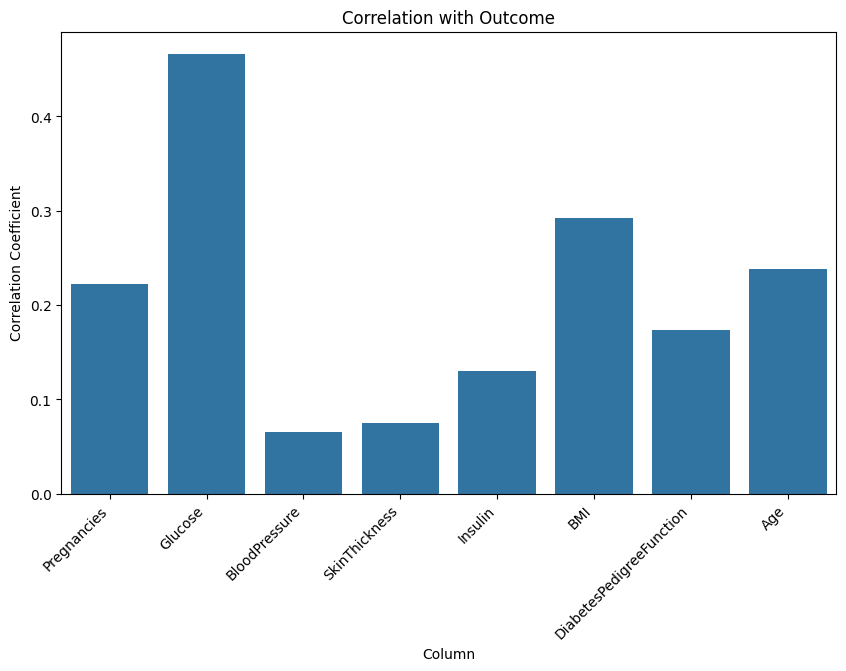

In [33]:



correlation_matrix = df.drop(columns=['Outcome']).corrwith(df['Outcome'])

# Plot correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Outcome')
plt.xlabel('Column')
plt.ylabel('Correlation Coefficient')
plt.show()


In [34]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [42]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])



In [47]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4640 - accuracy: 0.7883 - val_loss: 0.4653 - val_accuracy: 0.7857
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4624 - accuracy: 0.7850 - val_loss: 0.4642 - val_accuracy: 0.7987
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4617 - accuracy: 0.7801 - val_loss: 0.4640 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.7834 - val_loss: 0.4635 - val_accuracy: 0.7987
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.7801 - val_loss: 0.4637 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.7801 - val_loss: 0.4641 - val_accuracy: 0.7922
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.7801 - val_loss: 0.4625 - val_accuracy: 0.8052
Epoch 8/100
2

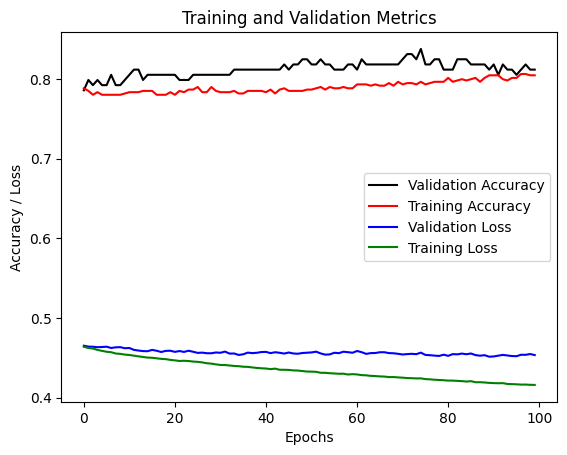

In [48]:
plt.plot(history.history['val_accuracy'], color='black', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='green', label='Training Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Metrics')
plt.legend()

# Show plot
plt.show()


# our goal here is to know
#1 how to select appropriate optimizer
#2 no. of nodes in a layer
#3 how to select no. of layers
#4 All in one model

# this all will be done one by one by using keras tuner library

# here we are trying to find the best optimizer the model

In [51]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [52]:
import kerastuner as kt


<ipython-input-52-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [53]:
# in this we are building a function which will help to choose the correct optimizer
def build_model(hp):

  model=Sequential()
  model.add(Dense(32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
  # this optimizer is given choice so this model will choose every optimizer once and work with that and give the best optimizer


  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [54]:
# now making a tuner object

tuner=kt.RandomSearch(build_model,
                      objective='val_accuracy',
                      max_trials=5)



In [55]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.8051947951316833

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 11s


In [ ]:
tuner.results_summary()
# here we can see that adadelta has preformed best with val_accuracy

In [60]:
# now directly calling the model based on the best optimnzer
model = tuner.get_best_models(num_models=1)[0]





In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.fit(X_train,y_train,epochs=100,initial_epochs=6,batch_size=32,validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3919 - accuracy: 0.8241 - val_loss: 0.4579 - val_accuracy: 0.7987
Epoch 8/100
20/20 [==============================] - 0s 15ms/step - loss: 0.3920 - accuracy: 0.8241 - val_loss: 0.4583 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3915 - accuracy: 0.8257 - val_loss: 0.4607 - val_accuracy: 0.7922
Epoch 10/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3911 - accuracy: 0.8274 - val_loss: 0.4603 - val_accuracy: 0.7987
Epoch 11/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3907 - accuracy: 0.8241 - val_loss: 0.4600 - val_accuracy: 0.7987
Epoch 12/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3908 - accuracy: 0.8274 - val_loss: 0.4613 - val_accuracy: 0.8052
Epoch 13/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3903 - accuracy: 0.8274 - val_loss: 0.4619 - val_accuracy: 0.7987
Epo

#now we will be taking out how to know suitable number of neurons in the layers

In [68]:
def build_model(hp):

   model=Sequential()

   units=hp.Int('units',min_value=8,max_value=128,step=8)
   """ here in unit we are giving initial number of neuran to be 8 and move with 8 step size which means it will first take 8 neuron and make a model ,
   then with 16   until it rechase 128
   incase we remove the step then  it will take default vallue as 1"""


   model.add(Dense(units=units,activation='relu',input_dim=8))
   model.add(Dense(1,activation='sigmoid'))

   model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
   # here we used adam as opimizer as from the previous codes we know that adam is best for the data
   return model

In [71]:
# again making tuner object

tuner=kt.RandomSearch(build_model,
                      objective='val_accuracy',
                      max_trials=5,
                      directory='mydir')


In [73]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 18s


In [ ]:
tuner.results_summary()

In [76]:
tuner.get_best_hyperparameters()[0].values# gettiing us best parameters

{'units': 128}

In [78]:
model=tuner.get_best_models(num_models=1)[0]

In [80]:
model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 1s 19ms/step - loss: 0.4664 - accuracy: 0.7769 - val_loss: 0.4880 - val_accuracy: 0.7987
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4608 - accuracy: 0.7818 - val_loss: 0.4851 - val_accuracy: 0.7922
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4565 - accuracy: 0.7785 - val_loss: 0.4804 - val_accuracy: 0.7857
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4530 - accuracy: 0.7769 - val_loss: 0.4800 - val_accuracy: 0.8052
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4497 - accuracy: 0.7785 - val_loss: 0.4808 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4473 - accuracy: 0.7801 - val_loss: 0.4815 - val_accuracy: 0.8052
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4464 - accuracy: 0.7752 - val_loss: 0.4800 - val_accuracy: 0.7922
Epoch 8

# how to select number of layers

In [86]:
def build_model(hp):

  model=Sequential()

  model.add(Dense(128,activation='relu',input_dim=8))

  # running a loop from 1 to 10 this will make 10 different model with different number of layer
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    model.add(Dense(128,activation='relu'))
    """ in every layer there will be 128 number of nodes . we have arrived on this from previous exercise where we got to know 128
    neuron should be present in a layer"""

  model.add(Dense(1,activation='sigmoid'))


  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [87]:
tuner=kt.RandomSearch(build_model,
                      objective='val_accuracy',
                      max_trials=3,
                      directory='mydir',
                      project_name='num_layers')

Reloading Tuner from mydir/num_layers/tuner0.json


In [88]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 01m 59s


In [91]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3}

In [94]:
model=tuner.get_best_models(num_models=1)[0]

model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 0.4336 - accuracy: 0.7964 - val_loss: 0.4735 - val_accuracy: 0.8117
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 0.7948 - val_loss: 0.4762 - val_accuracy: 0.7922
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4258 - accuracy: 0.7980 - val_loss: 0.4978 - val_accuracy: 0.7857
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4167 - accuracy: 0.8062 - val_loss: 0.4745 - val_accuracy: 0.8247
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4008 - accuracy: 0.8046 - val_loss: 0.4794 - val_accuracy: 0.8117
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.8274 - val_loss: 0.4779 - val_accuracy: 0.8182
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3701 - accuracy: 0.8274 - val_loss: 0.5053 - val_accuracy: 0.7922
Epoch 8/100


# now we are making a model with different method which we have used previously and combining them together

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner import HyperParameters

def build_space(hp):
    model = Sequential()
    counter = 0

    for i in range(hp.Int('num_layers', min_value=8, max_value=10)):
        if counter == 0:
            model.add(
                Dense(
                    units=hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=8
                )
            )
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(
                Dense(
                    units=hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        counter += 1

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'adadelta', 'nadam']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [108]:
tuner1=kt.RandomSearch(build_model,
                      objective='val_accuracy',
                      max_trials=3,
                      directory='mydir',
                      project_name='final2')

In [109]:
tuner1.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 09s


In [110]:
tuner1.get_best_hyperparameters()[0].values

{'num_layers': 1}

In [111]:
model=tuner1.get_best_models(num_models=1)[0]


In [ ]:

model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))